In [13]:
import pandas as pd
import seaborn as sns
from aequitas import Audit
import aequitas.plot as ap

import warnings; 
warnings.simplefilter('ignore')

%matplotlib inline

In [14]:
df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")
df.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


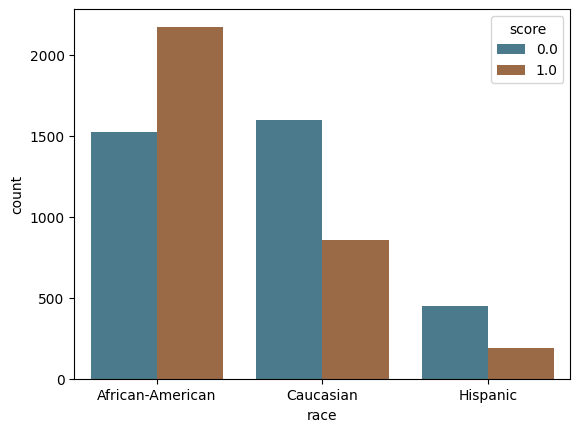

In [16]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)

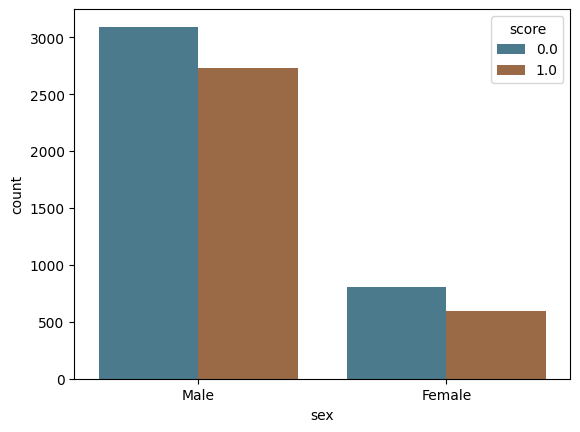

In [17]:
by_sex = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)

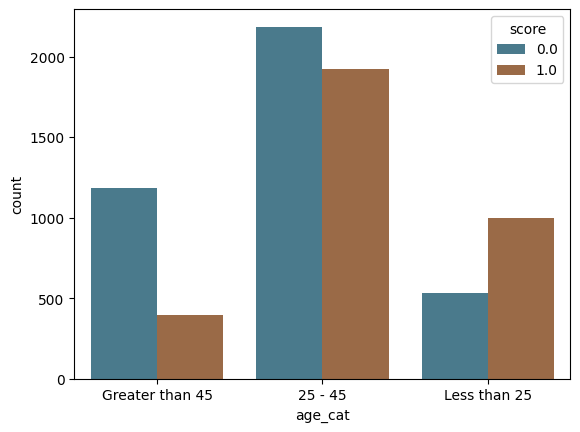

In [18]:
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

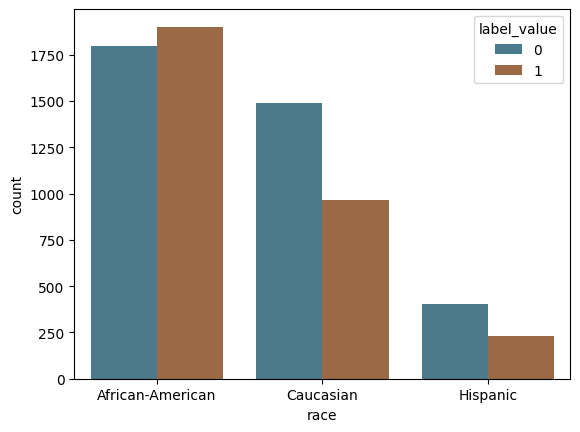

In [19]:
label_by_race = sns.countplot(x="race", hue="label_value", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)

In [20]:
audit = Audit(df.drop(columns=["entity_id"]), label_column="label_value")
audit.audit()

In [21]:
audit.confusion_matrix

pp    pn   fp    fn    tn    tp  \
attribute_name attribute_value                                       
race           African-American  2174  1522  805   532   990  1369   
               Asian                8    24    2     3    21     6   
               Caucasian          854  1600  349   461  1139   505   
               Hispanic           190   447   87   129   318   103   
               Native American     12     6    3     1     5     9   
               Other               79   298   36    90   208    43   
sex            Female             591   804  288   195   609   303   
               Male              2726  3093  994  1021  2072  1732   
age_cat        25 - 45           1924  2185  741   706  1479  1183   
               Greater than 45    394  1182  181   285   897   213   
               Less than 25       999   530  360   225   305   639   

                                 group_label_pos  group_label_neg  group_size  \
attribute_name attribute_value                                                  
race           African-American             1901             1795        3696   
               Asian                           9               23          32   
               Caucasian                     966             1488        2454   
               Hispanic                      232              405         637   
               Native American                10                8          18   
               Other                         133              244         377   
sex            Female                        498              897        1395   
               Male                         2753             3066        5819   
age_cat        25 - 45                      1889             2220        4109   
               Greater than 45               498             1078        1576   
               Less than 25                  864              665        1529   

                                 total_entities  
attribute_name attribute_value                   
race           African-American            7214  
               Asian                       7214  
               Caucasian                   7214  
               Hispanic                    7214  
               Native American             7214  
               Other                       7214  
sex            Female                      7214  
               Male                        7214  
age_cat        25 - 45                     7214  
               Greater than 45             7214  
               Less than 25                7214

In [22]:
audit.metrics.round(2)

accuracy   tpr   tnr   for   fdr   fpr   fnr  \
attribute_name attribute_value                                                  
race           African-American      0.64  0.72  0.55  0.35  0.37  0.45  0.28   
               Asian                 0.84  0.67  0.91  0.12  0.25  0.09  0.33   
               Caucasian             0.67  0.52  0.77  0.29  0.41  0.23  0.48   
               Hispanic              0.66  0.44  0.79  0.29  0.46  0.21  0.56   
               Native American       0.78  0.90  0.62  0.17  0.25  0.38  0.10   
               Other                 0.67  0.32  0.85  0.30  0.46  0.15  0.68   
sex            Female                0.65  0.61  0.68  0.24  0.49  0.32  0.39   
               Male                  0.65  0.63  0.68  0.33  0.36  0.32  0.37   
age_cat        25 - 45               0.65  0.63  0.67  0.32  0.39  0.33  0.37   
               Greater than 45       0.70  0.43  0.83  0.24  0.46  0.17  0.57   
               Less than 25          0.62  0.74  0.46  0.42  0.36  0.54  0.26   

                                  npv  precision   ppr  pprev  prev  
attribute_name attribute_value                                       
race           African-American  0.65       0.63  0.66   0.59  0.51  
               Asian             0.88       0.75  0.00   0.25  0.28  
               Caucasian         0.71       0.59  0.26   0.35  0.39  
               Hispanic          0.71       0.54  0.06   0.30  0.36  
               Native American   0.83       0.75  0.00   0.67  0.56  
               Other             0.70       0.54  0.02   0.21  0.35  
sex            Female            0.76       0.51  0.18   0.42  0.36  
               Male              0.67       0.64  0.82   0.47  0.47  
age_cat        25 - 45           0.68       0.61  0.58   0.47  0.46  
               Greater than 45   0.76       0.54  0.12   0.25  0.32  
               Less than 25      0.58       0.64  0.30   0.65  0.57

In [23]:
audit = Audit(df.drop(columns=["entity_id"]), label_column="label_value",
              reference_groups={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'})

audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})

audit.disparity_df.style

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,True,True,0.906085,Caucasian,False,0.586416,Caucasian,True,1.213154,Caucasian,True,1.912093,Caucasian,False,0.913728,Caucasian,True,2.545667,Caucasian,True,1.690224,Caucasian,True,1.064904,Caucasian,False,0.720526,Caucasian,False,1.377549,Caucasian,True
1,0,binary 0/1,3317,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,False,False,0.611748,Caucasian,False,0.698482,Caucasian,False,0.433839,Caucasian,False,0.370749,Caucasian,False,1.229148,Caucasian,False,0.009368,Caucasian,False,0.718384,Caucasian,False,1.268317,Caucasian,False,1.192808,Caucasian,False,1.275248,Caucasian,False
2,0,binary 0/1,3317,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,False,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False
3,0,binary 0/1,3317,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,False,True,1.120464,Caucasian,False,1.165140,Caucasian,False,1.001616,Caucasian,False,0.915887,Caucasian,False,0.999346,Caucasian,False,0.222482,Caucasian,True,0.857099,Caucasian,True,0.916748,Caucasian,False,1.025773,Caucasian,False,0.849249,Caucasian,False
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,False,True,0.611748,Caucasian,False,0.209544,Caucasian,False,0.578453,Caucasian,False,1.598854,Caucasian,False,1.170618,Caucasian,False,0.014052,Caucasian,True,1.915691,Caucasian,True,1.268317,Caucasian,False,0.816506,Caucasian,False,1.721584,Caucasian,False
5,0,binary 0/1,3317,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,False,True,1.115085,Caucasian,False,1.417970,Caucasian,False,1.048203,Caucasian,False,0.629057,Caucasian,False,0.980490,Caucasian,False,0.092506,Caucasian,True,0.602147,Caucasian,True,0.920466,Caucasian,False,1.113660,Caucasian,False,0.618447,Caucasian,False
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,True,True,1.336425,Male,True,1.055810,Male,True,0.734738,Male,True,0.990343,Male,True,1.130710,Male,True,0.216801,Male,True,0.904348,Male,True,0.806925,Male,True,1.004633,Male,True,0.967101,Male,True
7,0,binary 0/1,3317,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,False,False,1.00000

In [24]:
audit.disparities.style

In [25]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [26]:
audit.summary_plot(metrics=metrics, fairness_threshold=disparity_tolerance)

alt.VConcatChart(...)

In [27]:
audit.disparity_plot(metrics=metrics, attribute='race', fairness_threshold=disparity_tolerance)

alt.LayerChart(...)

In [30]:
ap.absolute(df, metrics, 'race', fairness_threshold = disparity_tolerance)

The dataframe does not contain the column "attribute_name"


KeyError: 'attribute_name'